# Requirement:

Repeat the work in st2195_assignment_8_2.ipynb using one year ago data and compare the output with the latest results using a 3x2 subplot containing all the network representations.

Upload the data used for the work in csv format in the GitHub repository.

In [2]:
# initial set up

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-v0_8-colorblind')
%matplotlib inline


In [3]:
import os
import numpy as np
import pandas as pd

# Set working directory
os.chdir(r"C:/Users/tsuji/Dropbox/study/UoL/ST2195 Programming for Data Science/lecture8/st2195_assignment_8")

# Read CSV file 
dataset = pd.read_csv("IMTS_export_dataset.csv")
dataset = dataset[dataset["INDICATOR"]=="Exports of goods, Free on board (FOB), US dollar"]
# Check NaN
print(dataset.isna().sum())

DATASET                0
SERIES_CODE            0
OBS_MEASURE            0
COUNTRY                0
INDICATOR              0
COUNTERPART_COUNTRY    0
FREQUENCY              0
SCALE                  0
2020                   1
2021                   1
2022                   1
2023                   1
2024                   1
dtype: int64


In [4]:
# filter out NaN
dataset = dataset.dropna(subset=["2023"])
# Check NaN
print(dataset.isna().sum())

DATASET                0
SERIES_CODE            0
OBS_MEASURE            0
COUNTRY                0
INDICATOR              0
COUNTERPART_COUNTRY    0
FREQUENCY              0
SCALE                  0
2020                   0
2021                   0
2022                   0
2023                   0
2024                   0
dtype: int64


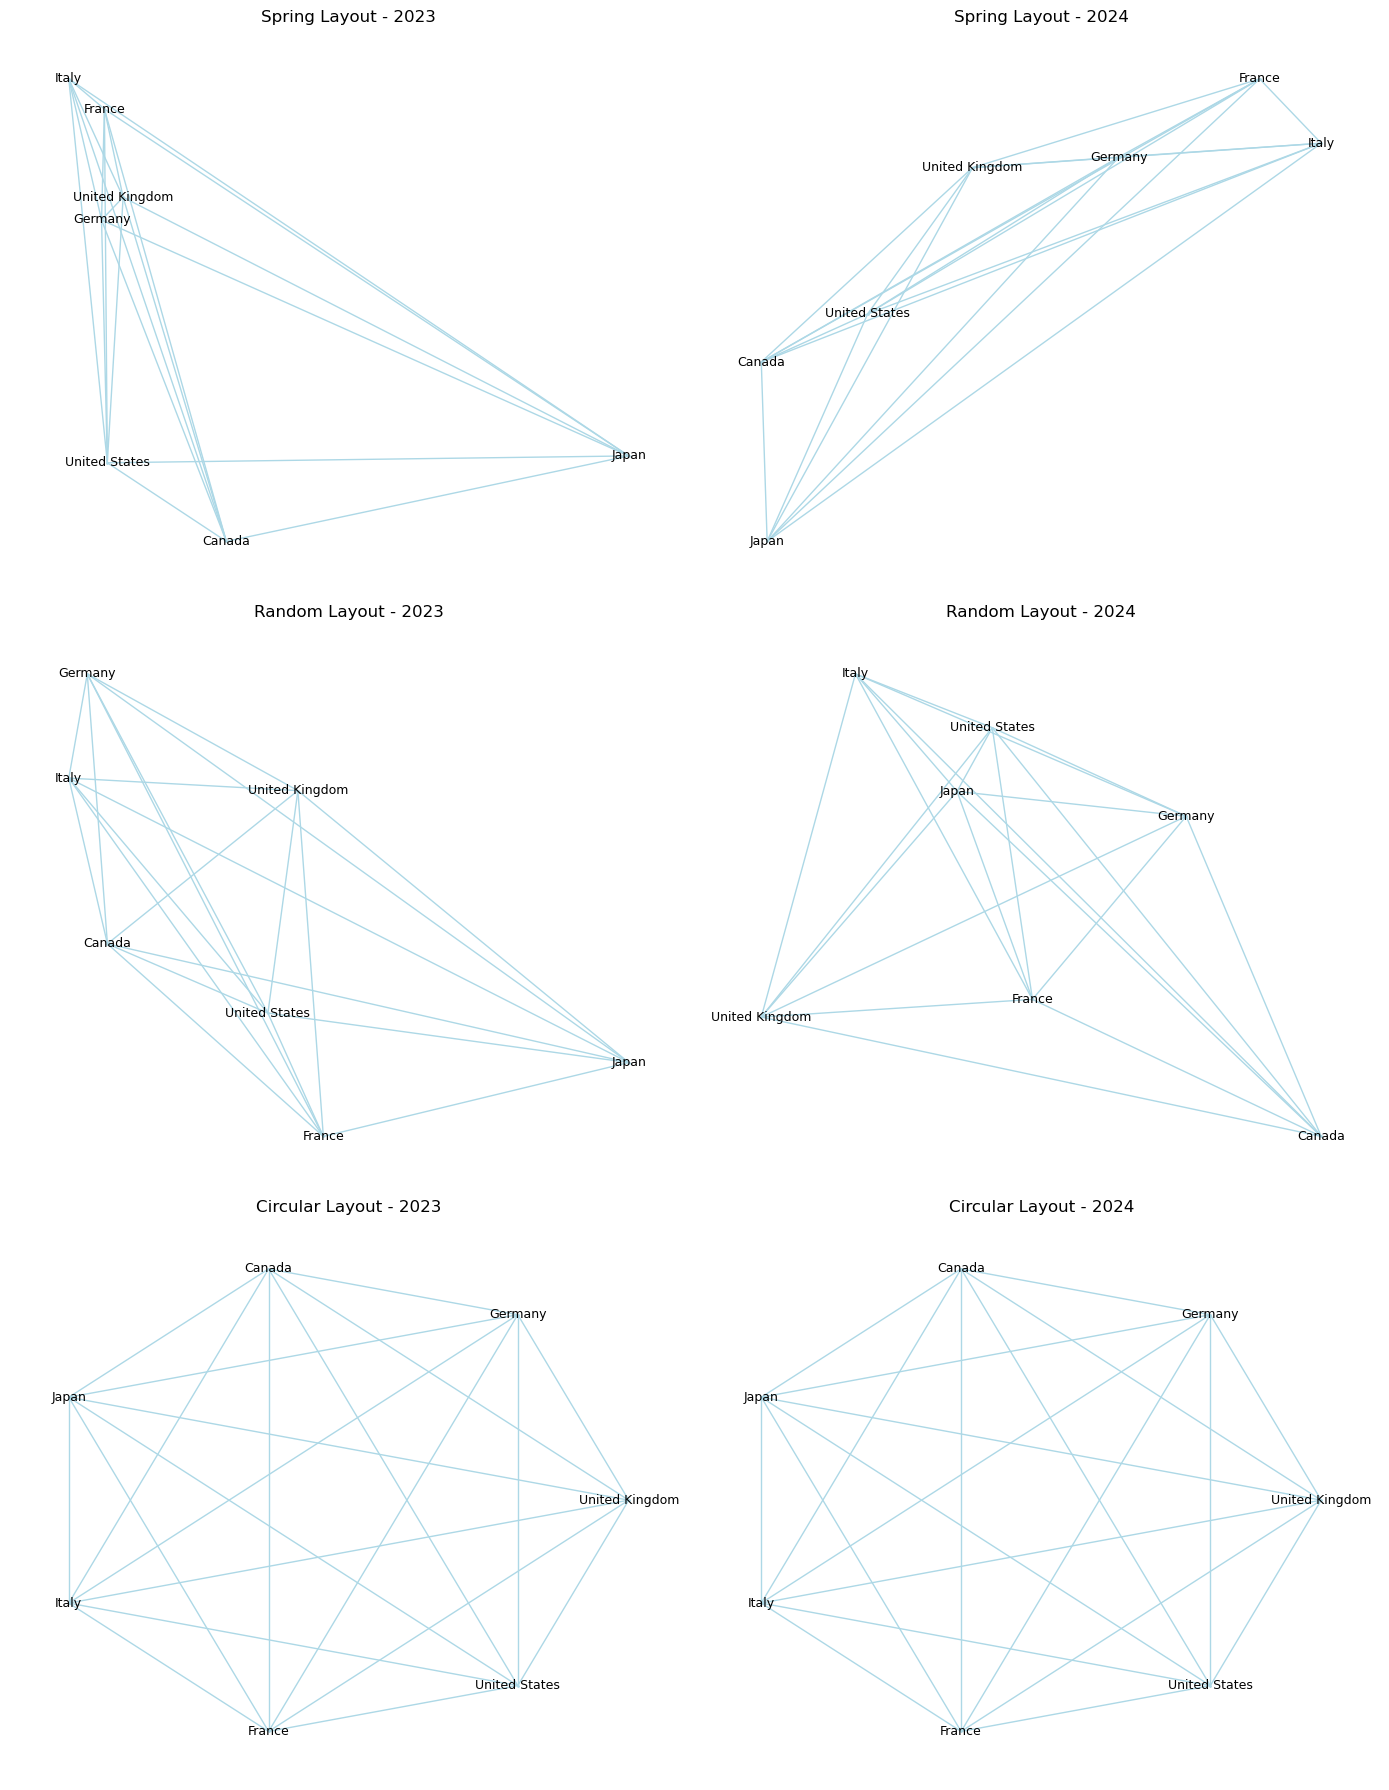

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

layouts = [
    ('Spring Layout', nx.spring_layout),
    ('Random Layout', nx.random_layout),
    ('Circular Layout', nx.circular_layout)
]

#Setting size and colours
options = {'node_color': 'lightblue', 'edge_color': 'lightblue', 'node_size': 1, 'width': 1, 'alpha': 1.0,}

years = ['2023', '2024']  

for col, year in enumerate(years):
    # Prepare data for the selected year
    G = nx.Graph()
    for index, row in dataset.iterrows():
        G.add_edge(row['COUNTRY'], row['COUNTERPART_COUNTRY'], weight=row[year])
    # remove isolated vertices (if any)    
    remove = [node for node, degree in G.degree() if degree == 0]
    G.remove_nodes_from(remove)
    
    for row_idx, (layout_name, layout_func) in enumerate(layouts):
        ax = axes[row_idx, col]
        pos = layout_func(G)
        nx.draw(G, pos=pos, font_size=9, ax=ax, **options)
        nx.draw_networkx_labels(G, pos=pos, font_size=9, ax=ax)
        ax.set_title(f"{layout_name} - {year}")
        ax.axis('off')

plt.tight_layout()
plt.show()
